In [21]:
from langgraph.graph import StateGraph, START, END
from typing import TypedDict
from langchain_openai import ChatOpenAI
from dotenv import load_dotenv
from langchain.prompts import PromptTemplate
import os
from pydantic import BaseModel, Field
import operator
from typing import Annotated, Literal

In [22]:
load_dotenv()

True

In [23]:
model = ChatOpenAI(model="gpt-4o-mini")

In [24]:
class QuadState(TypedDict):
    a: float
    b: float
    c: float
    
    equation: str
    discriminant: float
    result: str

In [30]:
def show_equation(state: QuadState):
    equation = f"The quadratic equation is: {state['a']}x^2 + {state['b']}x + {state['c']} = 0"
    return {"equation": equation}

In [31]:
def calculate_discriminant(state: QuadState):
    discriminant = state['b']**2 - 4*state['a']*state['c']
    return {"discriminant": discriminant}

In [32]:
def real_roots(state: QuadState):
    root1 = (-state["b"] + state["discriminant"] ** 0.5) / (2 * state["a"])
    root2 = (-state["b"] - state["discriminant"] ** 0.5) / (2 * state["a"])
    result = f"The roots are {root1} and {root2}"
    
    return {"result": result}

def no_real_root(state: QuadState):
    result = f"No real roots"
    
    return {"result": result}

def repeated_root(state: QuadState):
    root = (-state["b"]) / (2 * state["a"])
    result = f"Only repeating root is {root}"
    
    return {"result": result}

def check_condition(state: QuadState) -> Literal["real_roots", "no_real_root", "repeated_root"]:
    if state["discriminant"] > 0:
        return "real_roots"
    elif state["discriminant"] == 0:
        return "repeated_root"
    else:
        return "no_real_root"

In [33]:
# Create graph
graph = StateGraph(QuadState)

# Create nodes
graph.add_node("show_equation", show_equation)
graph.add_node("calculate_discriminant", calculate_discriminant)
graph.add_node("real_roots", real_roots)
graph.add_node("no_real_root", no_real_root)
graph.add_node("repeated_root", repeated_root)

# Define edges
graph.add_edge(START, "show_equation")
graph.add_edge("show_equation", "calculate_discriminant")

graph.add_conditional_edges("calculate_discriminant", check_condition)

graph.add_edge("real_roots", END)
graph.add_edge("no_real_root", END)
graph.add_edge("repeated_root", END)

# Compile the graph
workflow = graph.compile()

In [16]:
initial_state = {
    "a": 4,
    "b": -5,
    "c": -4
}

workflow.invoke(initial_state)

{'a': 4,
 'b': -5,
 'c': -4,
 'equation': 'The quadratic equation is: 4x^2 + -5x + -4 = 0',
 'discriminant': 89}

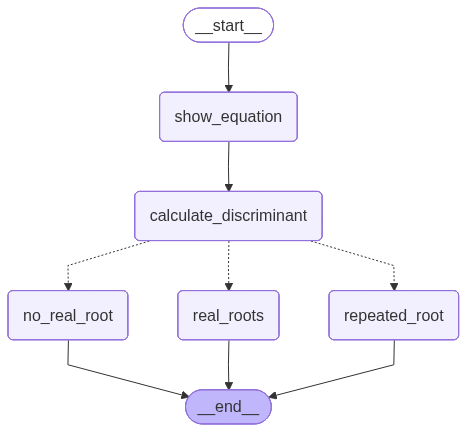

In [34]:
workflow

In [35]:
workflow.invoke(initial_state)

{'a': 4,
 'b': -5,
 'c': -4,
 'equation': 'The quadratic equation is: 4x^2 + -5x + -4 = 0',
 'discriminant': 89,
 'result': 'The roots are 1.8042476415070754 and -0.5542476415070754'}